# Filtro por FTT

Este Notebook utiliza uma Transformada de Fourier FTT para minimizar o ruido de uma imagem.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import fftpack
from matplotlib.colors import LogNorm

In [2]:
def show_gray(img, title):
  plt.figure(figsize=(12, 10))
  plt.title(title)
  plt.imshow(img, plt.cm.gray)
  plt.colorbar()
  plt.show();

def show_spect(IMG, title):
  plt.figure(figsize=(12, 10))
  plt.title(title)
  plt.imshow(np.abs(IMG), norm=LogNorm(vmin=5))
  plt.colorbar()
  plt.show();

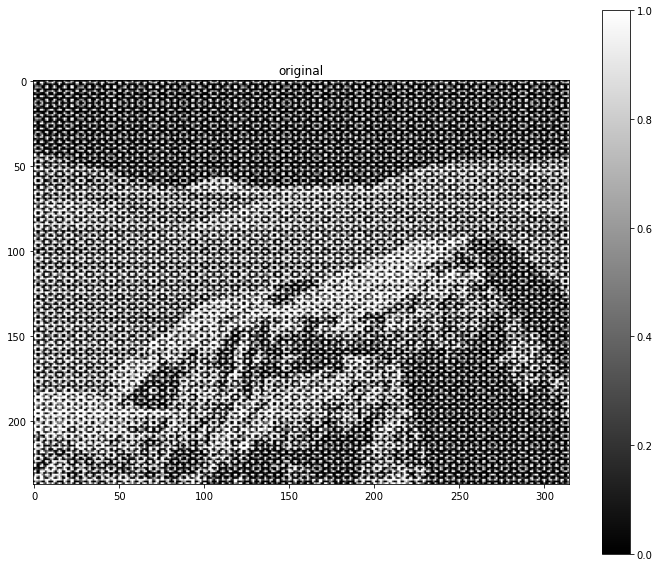

In [3]:
img_file = 'moonlanding.png'
img = plt.imread('./'+img_file).astype(float)
show_gray(img, 'original')

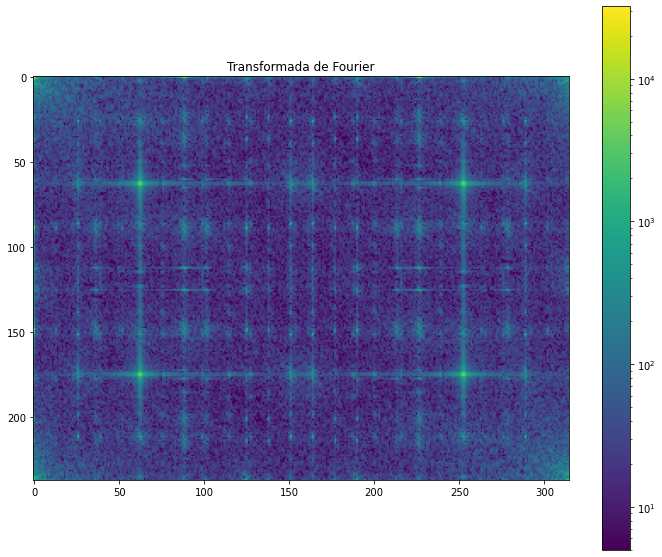

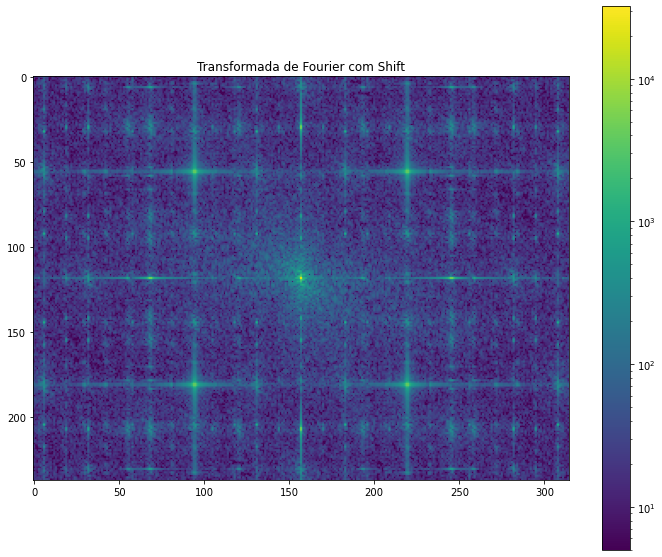

In [4]:
IMG = fftpack.fft2(img)
IMG_shift = fftpack.fftshift(IMG)
show_spect(np.abs(IMG), "Transformada de Fourier")
show_spect(np.abs(IMG_shift), "Transformada de Fourier com Shift")

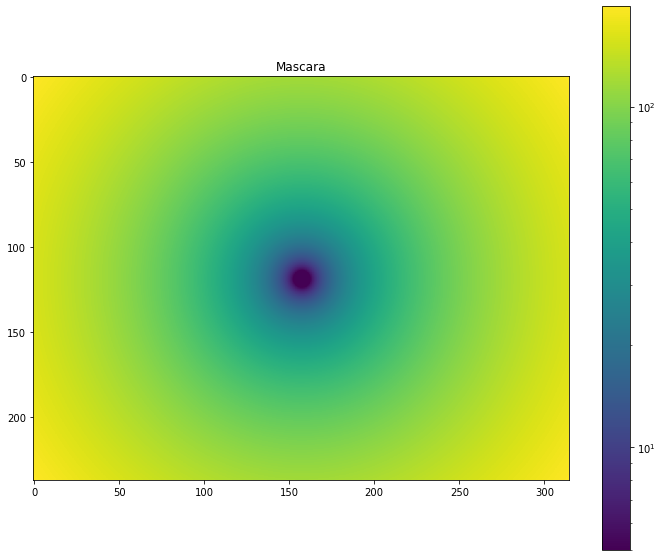

In [5]:
h, w = IMG_shift.shape[:2]
Y, X = np.ogrid[0:h, 0:w]
mask = np.sqrt((X-w/2)**2 + (Y-h/2)**2)

show_spect(mask, "Mascara")

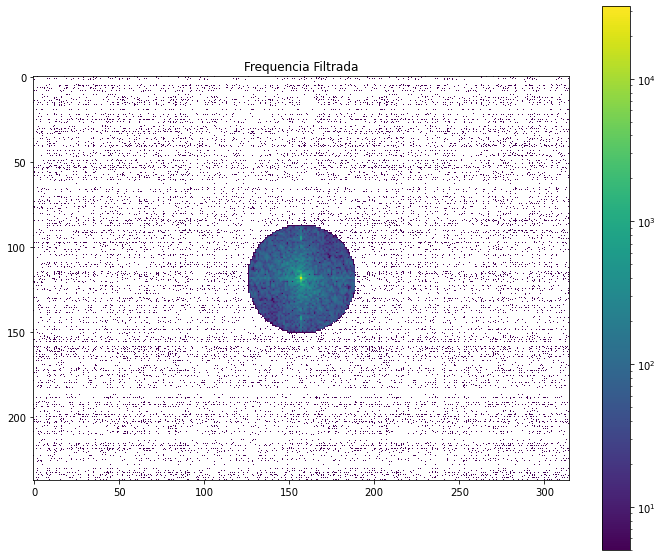

In [6]:
IMG_shift[mask>0.1*w]=0
show_spect(IMG_shift, "Frequencia Filtrada")

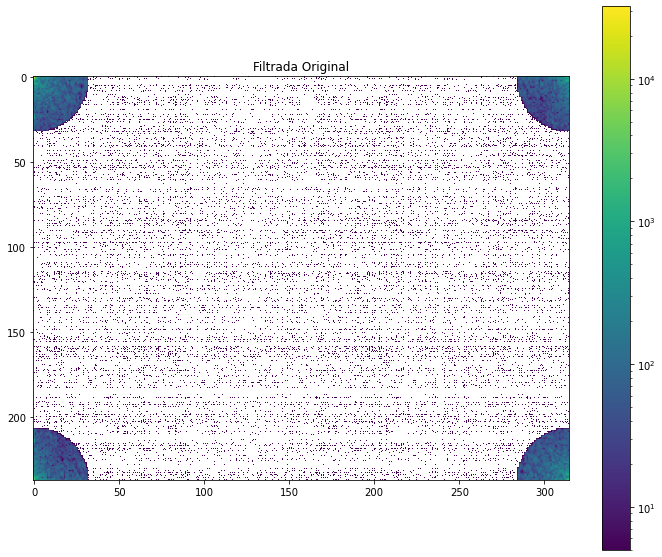

In [7]:
IMG_2 = fftpack.ifftshift(IMG_shift)
show_spect(IMG_2, "Filtrada Original")

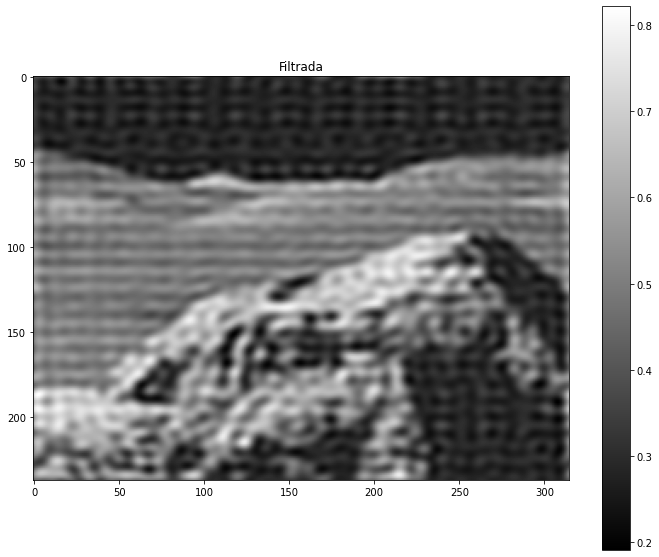

In [8]:
img2 = fftpack.ifft2(IMG_2).real
show_gray(img2, "Filtrada")

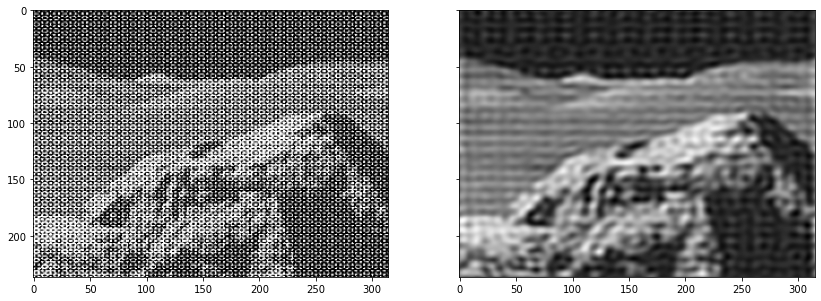

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,7))
ax1.imshow(img, plt.cm.gray)
ax2.imshow(img2, plt.cm.gray)